In [3]:
import collections
import os
import shutil
import tqdm

import numpy as np
import PIL.Image
import torch
import torchvision

from IPython.display import display

from pprint import pprint
from k12libs.utils.nb_easy import k12ai_get_top_dir
from k12libs.utils.nb_easy import k12ai_print

# 检查PyTorch版本

In [4]:
print(torch.__version__)               # PyTorch version
print(torch.version.cuda)              # Corresponding CUDA version
print(torch.backends.cudnn.version())  # Corresponding cuDNN version
print(torch.cuda.get_device_name(0))   # GPU type
print(torch.cuda.is_available())

1.4.0
10.1
7603
Tesla P40
True


# 固定随机种子

In [5]:
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

# 设置为cuDNN benchmark模式

In [6]:
# Benchmark模式会提升计算速度，但是由于计算中有随机性，每次网络前馈结果略有差异。
torch.backends.cudnn.benchmark = True
# 如果想要避免这种结果波动
torch.backends.cudnn.deterministic = True

# 创建与复制

In [7]:
np_a = np.array([1,2,3])
tensor_a = torch.tensor(np_a)
np_a, tensor_a

(array([1, 2, 3]), tensor([1, 2, 3]))

In [8]:
tensor_a[0] = -1
np_a, tensor_a

(array([1, 2, 3]), tensor([-1,  2,  3]))

In [9]:
tensor_a = torch.tensor([1.,2.,3.], requires_grad=True)
tensor_t = torch.tensor(tensor_a)
tensor_t[0] = -1.
tensor_a, tensor_t, tensor_a == tensor_t, id(tensor_a), id(tensor_t) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(tensor([1., 2., 3.], requires_grad=True),
 tensor([-1.,  2.,  3.]),
 tensor([False,  True,  True]),
 139621091109984,
 139621091110056)

In [10]:
tensor_t = tensor_a.clone()
tensor_t[0] = -1.0
tensor_a, tensor_t, tensor_a == tensor_t, id(tensor_a), id(tensor_t)

(tensor([1., 2., 3.], requires_grad=True),
 tensor([-1.,  2.,  3.], grad_fn=<CopySlices>),
 tensor([False,  True,  True]),
 139621091109984,
 139623273420480)

In [11]:
tensor_t = tensor_a.detach()
tensor_t[0] = -2.0
tensor_a, tensor_t, tensor_a == tensor_t, id(tensor_a), id(tensor_t)

(tensor([-2.,  2.,  3.], requires_grad=True),
 tensor([-2.,  2.,  3.]),
 tensor([True, True, True]),
 139621091109984,
 139621091108832)

In [12]:
tensor_t = tensor_a.data
tensor_t[0] = -3.0
tensor_a, tensor_t, tensor_a == tensor_t, id(tensor_a), id(tensor_t)

(tensor([-3.,  2.,  3.], requires_grad=True),
 tensor([-3.,  2.,  3.]),
 tensor([True, True, True]),
 139621091109984,
 139621090998672)

In [13]:
tensor_t = tensor_a
tensor_t[0] = -4.0
tensor_a, tensor_t, tensor_a == tensor_t, id(tensor_a), id(tensor_t)

(tensor([-4.,  2.,  3.], grad_fn=<CopySlices>),
 tensor([-4.,  2.,  3.], grad_fn=<CopySlices>),
 tensor([True, True, True]),
 139621091109984,
 139621091109984)

# 张量基本信息

In [14]:
tensor = torch.rand((3,4))
print(tensor.type())   # Data type
print(tensor.size())   # Shape of the tensor. It is a subclass of Python tuple
print(tensor.dim())    # Number of dimensions.

torch.FloatTensor
torch.Size([3, 4])
2


# 数据类型转换

In [15]:
torch.set_default_tensor_type(torch.FloatTensor)
tensor = tensor.cuda()
tensor = tensor.cpu()
tensor = tensor.float()
tensor = tensor.long()

# torch.Tensor -> np.ndarray

In [16]:
ndarray = tensor.cpu().numpy()
ndarray 

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

# np.ndarray -> torch.Tensor

In [17]:
tensor = torch.from_numpy(ndarray).float()
# tensor = torch.from_numpy(ndarray.copy()).float()
tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

# PIL.Image -> torch.Tensor.

In [18]:
image = PIL.Image.open(os.path.join(k12ai_get_top_dir(), 'assets/bear.jpg'))

tensor1 = torch.from_numpy(np.asarray(image)).permute(2, 0, 1).float() / 255

tensor2 = torchvision.transforms.functional.to_tensor(image)

tensor3 = torchvision.transforms.ToTensor()(image)

In [19]:
tensor1.shape, tensor2.shape, tensor2.shape, torch.equal(tensor1, tensor2), torch.equal(tensor1, tensor3)

(torch.Size([3, 256, 384]),
 torch.Size([3, 256, 384]),
 torch.Size([3, 256, 384]),
 True,
 True)

# torch.Tensor -> PIL.Image.

In [20]:
image1 = PIL.Image.fromarray(torch.clamp(tensor1 * 255, min=0, max=255
    ).byte().permute(1, 2, 0).cpu().numpy())

image2 = torchvision.transforms.functional.to_pil_image(tensor2)  # Equivalently way

image3 = torchvision.transforms.ToPILImage()(tensor3)

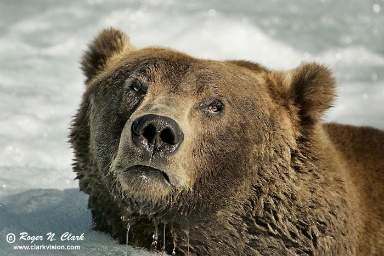

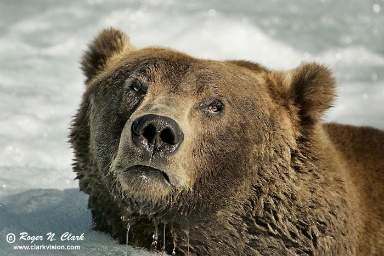

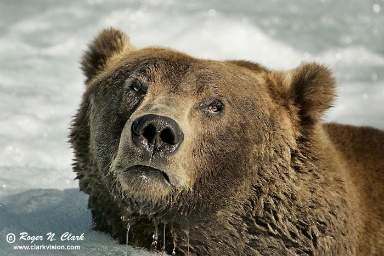

In [21]:
display(image1)
display(image2)
display(image3)

# 从只包含一个元素的张量中提取值

In [22]:
value = tensor[0][0].item()
value

0.0

# 张量形变

In [23]:
tensor = torch.reshape(tensor, (4,3))
tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

## 打乱顺序 ??

In [24]:
tensor = tensor[torch.randperm(tensor.size(0))]  # Shuffle the first dimension
tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

# 水平翻转

In [25]:
# TODO 
# Assume tensor has shape N*D*H*W.
# tensor = tensor[:, :, :, torch.arange(tensor.size(3) - 1, -1, -1).long()]

# 复制张量

In [26]:
# Operation                 |  New/Shared memory | Still in computation graph |
tensor.clone()            # |        New         |          Yes               |
tensor.detach()           # |      Shared        |          No                |
tensor.detach.clone()()   # |        New         |          No                |

AttributeError: 'builtin_function_or_method' object has no attribute 'clone'

# 拼接张量

注意torch.cat和torch.stack的区别在于torch.cat沿着给定的维度拼接，而torch.stack会新增一维。
例如当参数是3个10×5的张量，torch.cat的结果是30×5的张量，而torch.stack的结果是3×10×5的张量。

In [ ]:
tensor1 = torch.rand((2, 3))
tensor2 = torch.rand((3, 3))

tensor = torch.cat((tensor1, tensor2), dim=0)
tensor1, tensor2, tensor

In [ ]:
tensor1 = torch.rand((2, 3))
tensor2 = torch.rand((2, 3))
tensor3 = torch.rand((2, 3))
tensor = torch.stack((tensor1, tensor2, tensor3), dim=0)
tensor.shape, tensor1.shape

# 将整数标记转换成独热（one-hot）编码

In [ ]:
# TODO
# one_hot = torch.zeros(100, 10).long()
# one_hot.scatter_(dim=1, index=torch.unsqueeze(tensor, dim=1), src=torch.ones(100, 10).long())

# 得到非零/零元素


In [ ]:
print(torch.nonzero(tensor))              # Index of non-zero elements
print(torch.nonzero(tensor == 0))          # Index of zero elements
print(torch.nonzero(tensor).size(0))       # Number of non-zero elements
print(torch.nonzero(tensor == 0).size(0))  # Number of zero elements

# Sort (同时返回对应的index)

In [27]:
x = torch.randn(3,4)
x

tensor([[ 0.6035,  0.8110, -0.0451,  0.8797],
        [ 1.0482, -0.0445, -0.7229,  2.8663],
        [-0.5655,  0.1604, -0.0254,  1.0739]])

In [28]:
sorted, indices = torch.sort(x)
sorted, indices

(tensor([[-0.0451,  0.6035,  0.8110,  0.8797],
         [-0.7229, -0.0445,  1.0482,  2.8663],
         [-0.5655, -0.0254,  0.1604,  1.0739]]),
 tensor([[2, 0, 1, 3],
         [2, 1, 0, 3],
         [0, 2, 1, 3]]))